In [194]:
class Node:
    def __init__(self, node_id, row, col, func=None):
        self.node_id = node_id
        self.row = row
        self.col = col
        self.func = func
        self.inputs = []   # list of source node IDs
        self.outputs = []  # list of target node IDs

In [195]:
class Grid:
    def __init__(self, rows, cols):
        self.rows = rows
        self.cols = cols
        self.nodes = self._init_nodes()

    def _init_nodes(self):
        nodes = {}
        node_id = 0
        for r in range(self.rows):
            for c in range(self.cols):
                nodes[node_id] = Node(node_id, r, c)
                node_id += 1
        return nodes

    def __repr__(self):
        return f"Grid({self.rows}x{self.cols}, total_nodes={len(self.nodes)})"

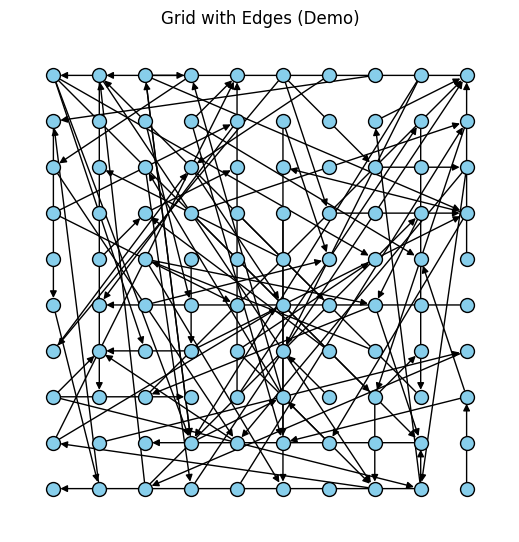

In [196]:
import networkx as nx
import matplotlib.pyplot as plt

# Using the Grid and Node classes we built earlier
grid = Grid(10, 10)  # smaller for demo

# Connect a few nodes manually
def connect(grid, src, dst):
    grid.nodes[src].outputs.append(dst)
    grid.nodes[dst].inputs.append(src)

for i in range(100):
    src = random.choice(list(grid.nodes.keys()))
    dst = random.choice(list(grid.nodes.keys()))
    if src != dst:  # avoid self-connections
        connect(grid, src, dst)

# Convert to NetworkX graph
def grid_to_networkx(grid):
    G = nx.DiGraph()
    pos = {}
    for node in grid.nodes.values():
        G.add_node(node.node_id)
        pos[node.node_id] = (node.col, -node.row)  # layout
        for dst in node.outputs:
            G.add_edge(node.node_id, dst)
    return G, pos

G, pos = grid_to_networkx(grid)

# Draw with edges
plt.figure(figsize=(5,5))
nx.draw(G, pos,
        node_size=100,
        node_color="skyblue",
        with_labels=False,
        arrows=True,
        edgecolors="black")
plt.title("Grid with Edges (Demo)")
plt.show()


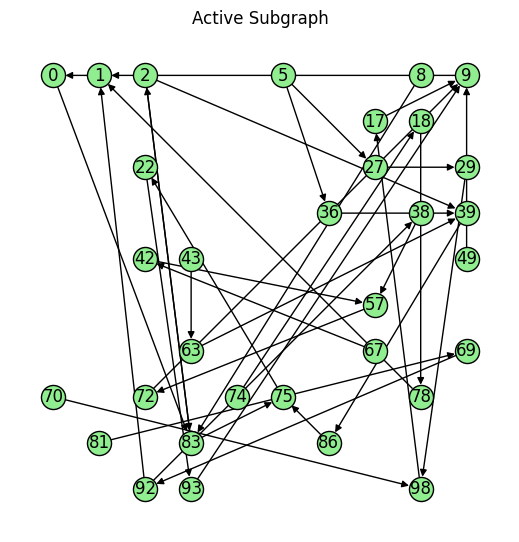

In [197]:
def get_active_nodes(grid, output_ids):
    """
    Traverse backward from outputs to find all active nodes.
    """
    active = set()

    def dfs(node_id):
        if node_id in active:
            return
        active.add(node_id)
        for inp in grid.nodes[node_id].inputs:
            dfs(inp)

    for out in output_ids:
        dfs(out)

    return active


def active_subgraph(grid, output_ids):
    """
    Build a NetworkX graph containing only active nodes + edges.
    """
    active = get_active_nodes(grid, output_ids)
    G = nx.DiGraph()
    pos = {}

    for node_id in active:
        node = grid.nodes[node_id]
        G.add_node(node_id)
        pos[node_id] = (node.col, -node.row)

        for inp in node.inputs:
            if inp in active:
                G.add_edge(inp, node_id)

    return G, pos

# Extract active subgraph (only nodes leading to node 0)
G, pos = active_subgraph(grid, output_ids=[0])

# Draw
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
nx.draw(G, pos, node_size=300, node_color="lightgreen",
        with_labels=True, arrows=True, edgecolors="black")
plt.title("Active Subgraph")
plt.show()